## Video3: 41586_2019_1429_MOESM4_ESM.mov 
- hFwe1(GFP)-hFwe2(RFP)
- 0-23.707hr

Live cell imaging (24 hr) showing the effect of co-culture of MCF-7 hFweKO cells expressing hFwe1-GFP and hFwe2-RFP. Significant cell death was observed in cells expressing hFwe1 when co-cultured with cells expressing hFwe2, n=3 biologically independent experiments with similar results.

In [13]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import imageio
import numpy as np
import flowermodel.find_blobs as fb
from tqdm import tqdm
import ipywidgets as widgets
from flowermodel import plotting  
import pandas as pd
import glob


# The following files were downloaded from 
# https://doi.org/10.1038/s41586-019-1429-3

# 41586_2019_1429_MOESM2_ESM.mov hFweX(GFP/RFP) 0-24.024hr
# 41586_2019_1429_MOESM3_ESM.mov hFwe1(GFP)-hFwe1(RFP) 0-23.707hr
# 41586_2019_1429_MOESM4_ESM.mov hFwe1(GFP)-hFwe2(RFP) 0-23.707hr
# 41586_2019_1429_MOESM5_ESM.mov hFwe1(GFP)-hFwe2(RFP) :10-26:18hr
# 41586_2019_1429_MOESM8_ESM.mov Z-VAD-FMK:hFwe1(GFP)-hFwe2(RFP) 0-24.09hr 
# 41586_2019_1429_MOESM9_ESM.mov hFweX(GFP)-hFweKO(RFP) 0-24.009?hr

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
!flowermodel framecount --filename /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM4_ESM.mov

271


In [12]:
%%bash
idx=4
flowermodel pbs --filename /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM${idx}_ESM.mov --jobname blob${idx}

qsub blob${idx}.pbs

10553230[].helix-master


In [14]:
import pandas as pd
import glob
moviefile = '41586_2019_1429_MOESM3_ESM.mov'
files = glob.glob('../data/blobs/{:s}/blob*.csv'.format(moviefile))
blobs = [pd.read_csv(file) for file in files]
blobs = pd.concat(blobs).sort_values(['frame', 'color', 'x', 'y']).reset_index(drop=True)

blobs.to_csv('../data/blobs/{:s}.blob.csv'.format(moviefile), index=False)

In [15]:
moviefile = '41586_2019_1429_MOESM4_ESM.mov'
blobs = pd.read_csv('../data/blobs/{:s}.blob.csv'.format(moviefile))

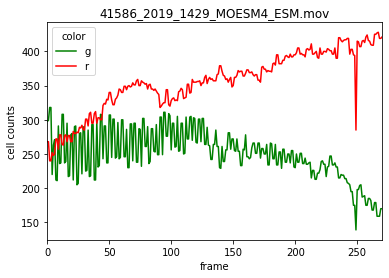

In [16]:
blobcounts = blobs.groupby(['frame', 'color']).size().unstack()
blobcounts.plot(color=['g', 'r'])
plt.ylabel('cell counts');
plt.title(moviefile);

In [17]:
filename = '../data/movies/{:s}'.format(moviefile)
vid = imageio.get_reader(filename,  'ffmpeg')

def f(img_idx):
    plotting.plot_blob_overlay(vid, img_idx, blobs);

interactive_plot = widgets.interactive(f, img_idx=widgets.IntSlider(
    min=0, max=vid.count_frames()-1, continuous_update=False))

output = interactive_plot.children[-1]
output.layout.height = '550px'
output.layout.width = '550px'
interactive_plot

interactive(children=(IntSlider(value=0, continuous_update=False, description='img_idx', max=270), Output(layo…

In [18]:
import flowermodel.calculate_rdf as crdf 
data_path = '/projects/chuang-lab/jnh/flower/data'
rdfobj = crdf.vidrdf(data_path, moviefile)

for color1 in ['r', 'g']:
    for color2 in ['r', 'g']:
        rdfdf = rdfobj.get_rdf(color1, color2)

100%|██████████| 271/271 [01:17<00:00,  3.49it/s]


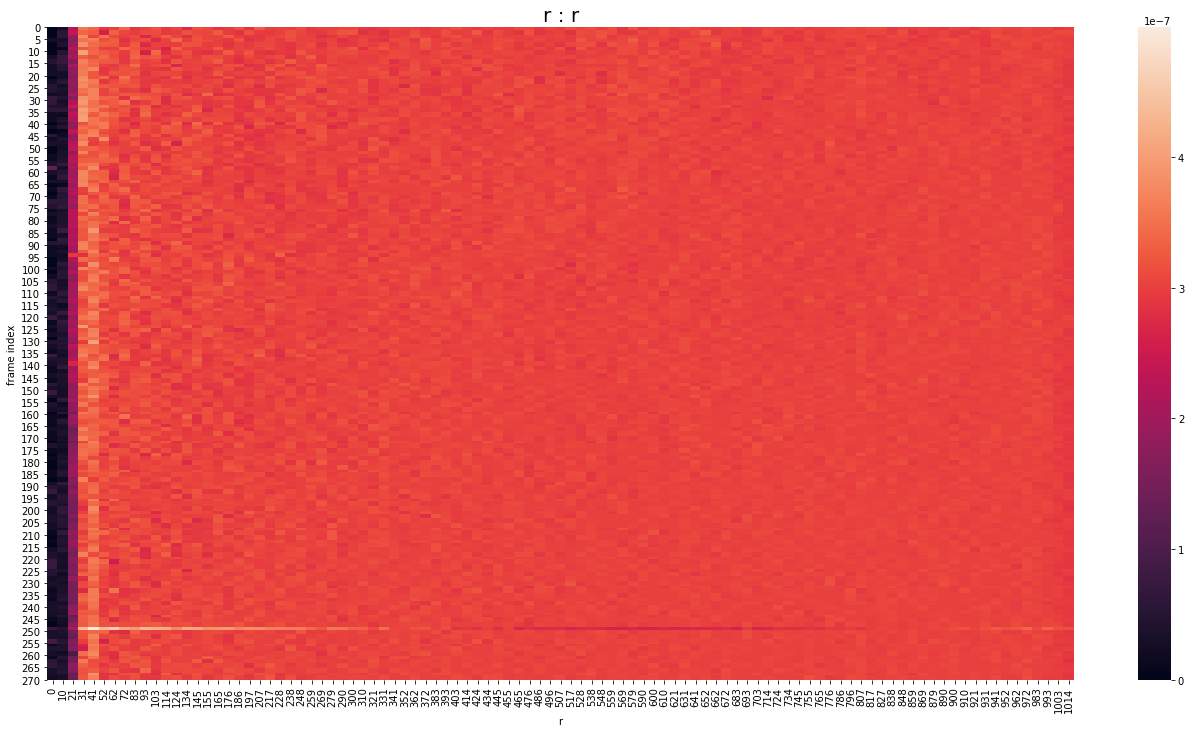

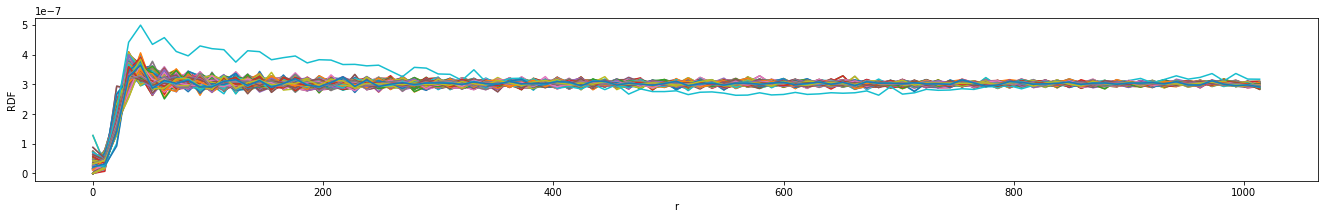

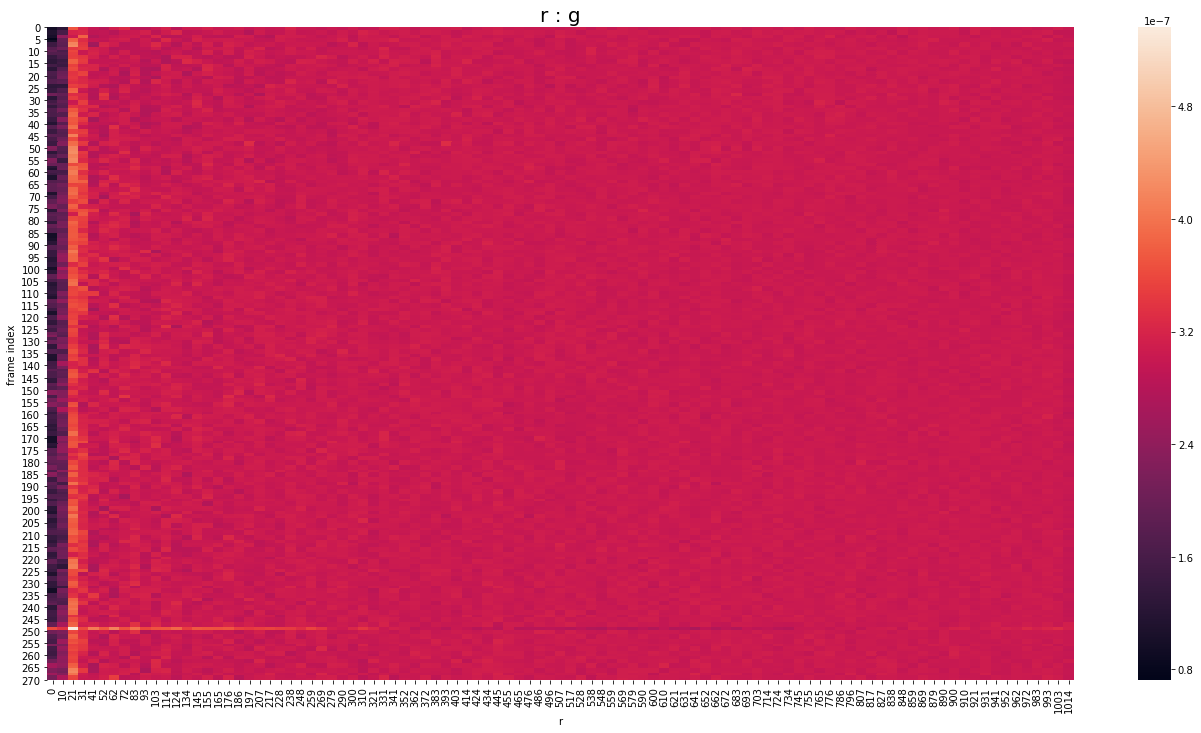

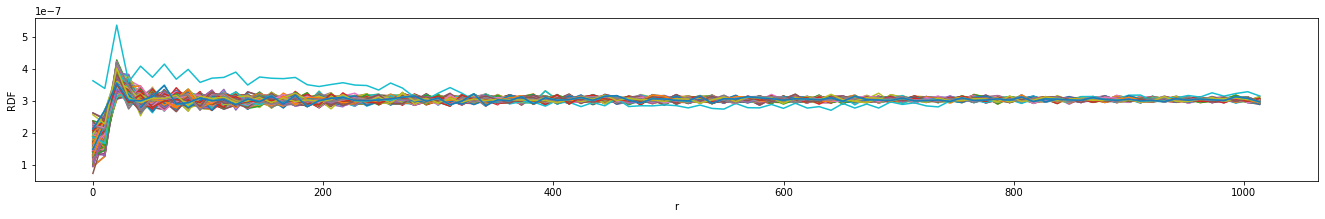

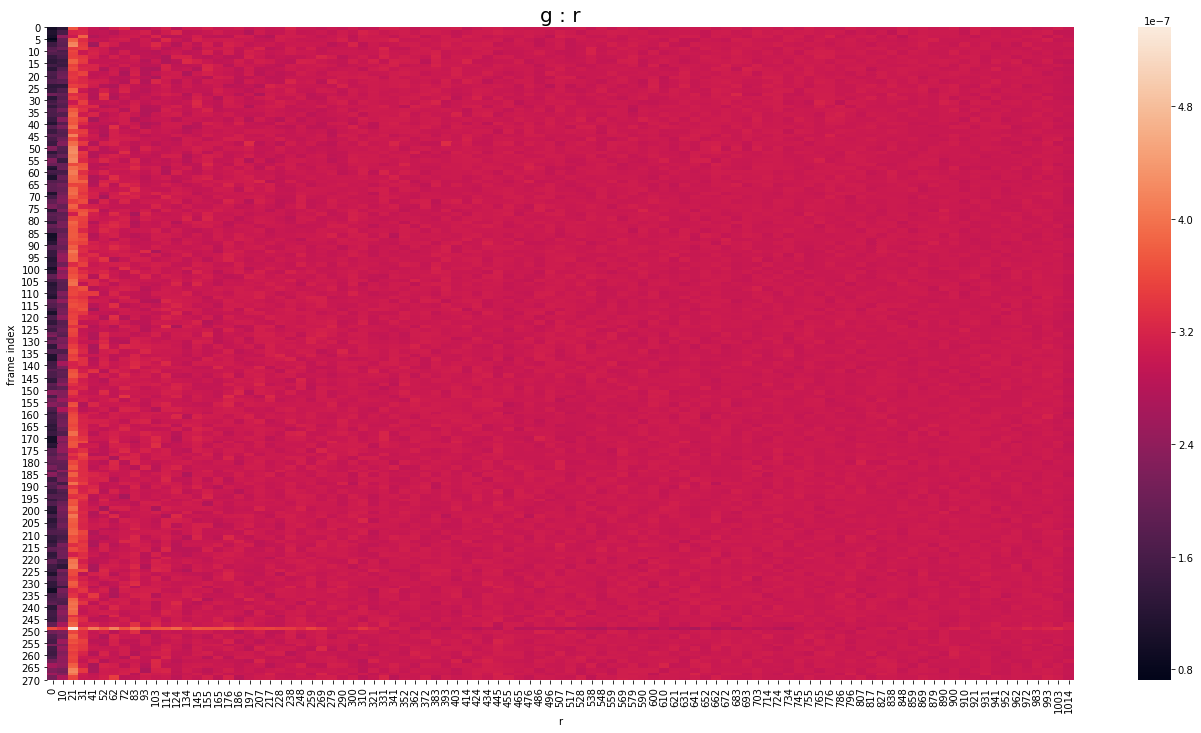

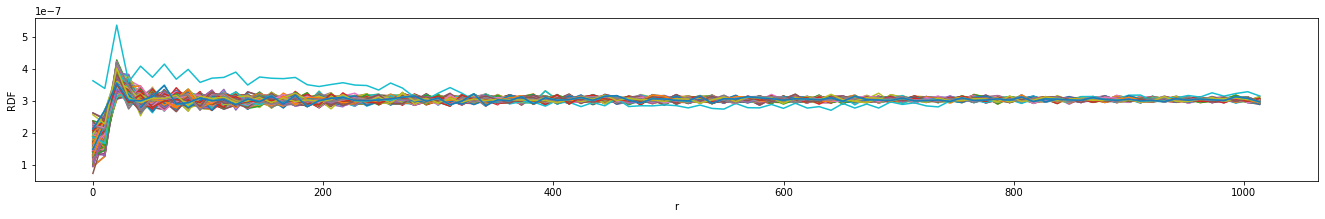

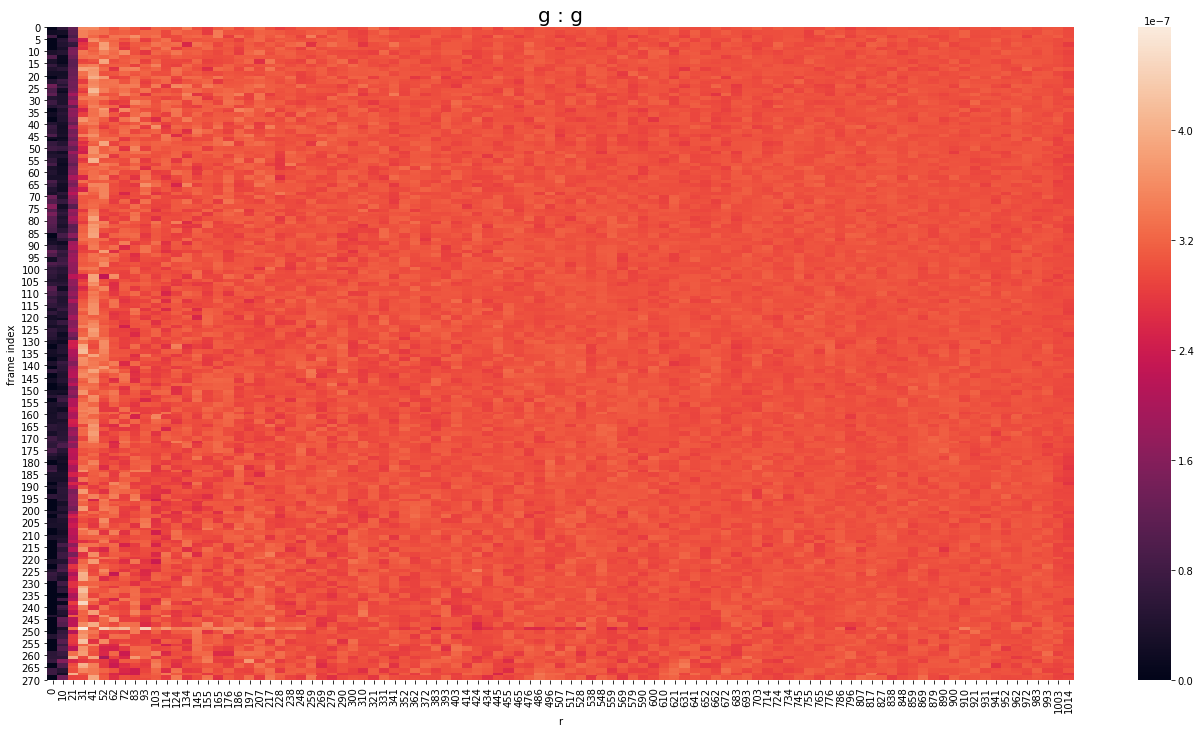

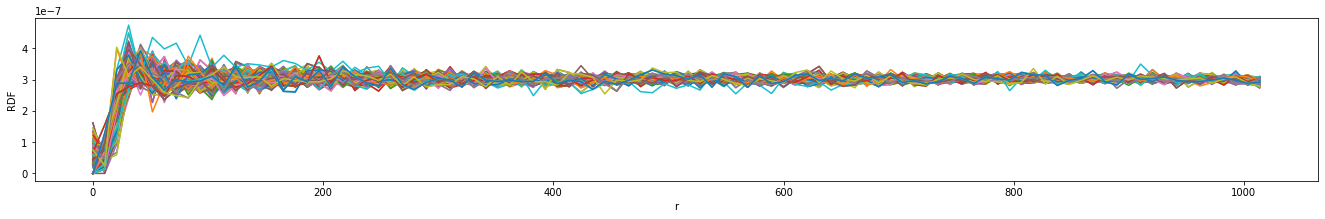

In [19]:
from flowermodel.plotting import plot_rdf_heatmap, plot_rdfs

for color1 in ['r', 'g']:
    for color2 in ['r', 'g']:
        rdf_file = '/projects/chuang-lab/jnh/flower/data/blobs/41586_2019_1429_MOESM4_ESM.mov.blob.rdf.color_{:s}{:s}.csv'.format(color1, color2)
        plot_rdf_heatmap(rdf_file)
        plt.title('{:s} : {:s}'.format(color1, color2), size=20)
        # plt.figure()
        plot_rdfs(rdf_file)

# Scratch

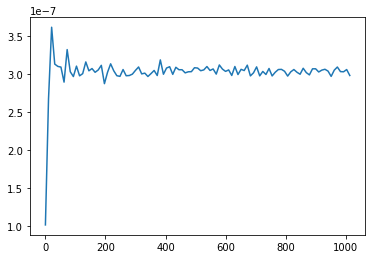

In [304]:
from flowermodel.calculate_rdf import framerdf

image_idx = 100
color1 = 'g'
color2 = 'r'

rdf = framerdf(vid, blobs, image_idx, color1, color2)#rdfobj.calculate_rdf()
plt.plot(rdf.rvals, rdf.rdf);

In [169]:
import flowermodel.calculate_rdf as crdf 
moviefile = '41586_2019_1429_MOESM4_ESM.mov'
data_path = '/projects/chuang-lab/jnh/flower/data'
rdfobj = crdf.vidrdf(data_path, moviefile)

In [170]:
c = crdf.framerdf(rdfobj.blobs, rdfobj.vid, 0, color1, color2)
np.diag(c.dist)

array([inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, in

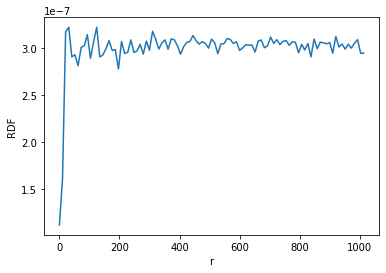

In [5]:
plt.plot(rvals, rdfs[2, :]);
plt.xlabel('r')
plt.ylabel('RDF');

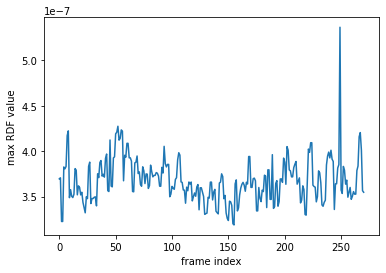

In [33]:
plt.plot(rdfs.max(axis=1))
plt.xlabel('frame index');
plt.ylabel('max RDF value');

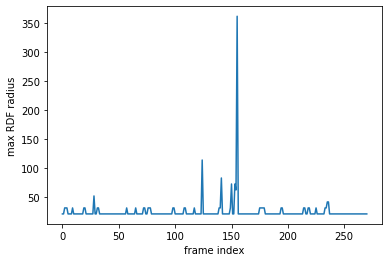

In [32]:
plt.plot(rvals[rdfs.argmax(axis=1)])
plt.xlabel('frame index');
plt.ylabel('max RDF radius');

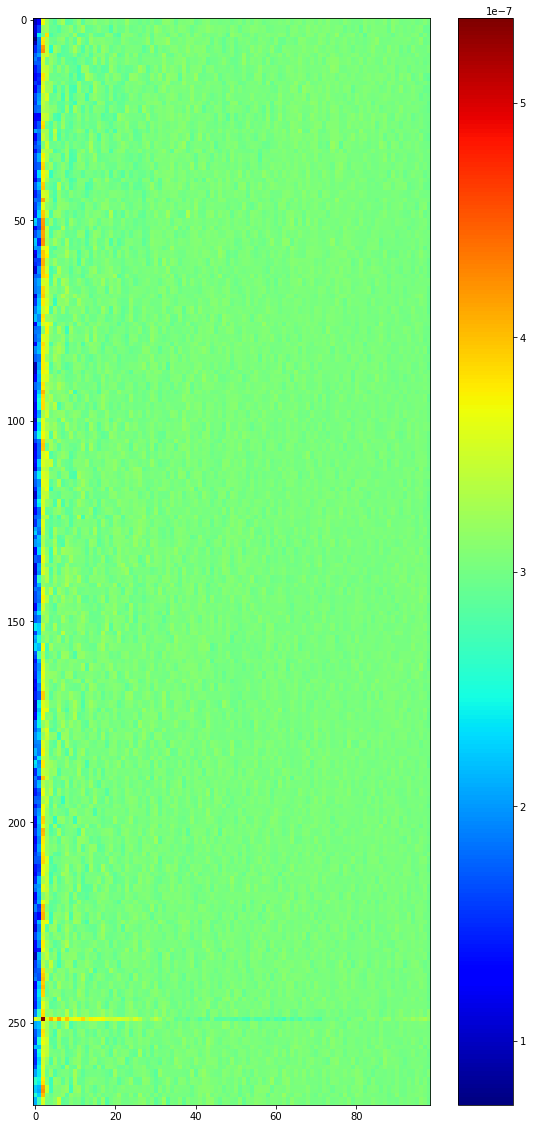

In [4]:
plt.figure(figsize=(10, 20))
plt.imshow(rdfs, cmap='jet');
plt.colorbar();

In [117]:
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import flowermodel.calculate_rdf as crdf           

def get_vid_rdfs(color1 = None, color2 = None, moviefile = None, data_path = None, save_to_file = True):
    blobfile = '{:s}/blobs/{:s}.blob.csv'.format(data_path, moviefile)
    vidfile = '{:s}/movies/{:s}'.format(data_path, moviefile)
    rdf_file = '{:s}/blobs/{:s}.blob.rdf.color_{:s}{:s}.csv'.format(data_path, moviefile, color1, color2)

    rvals, rdfs = v.get_rdf(color1, color2)
    rdfdf = pd.DataFrame(rdfs, columns=rvals)
    rdfdf.columns.name = 'r'
    rdfdf.index.name = 'frame index'
    
    if save_to_file:
        rdfdf.to_csv(rdf_file)
    return rdfdf, rdf_file


moviefile = '41586_2019_1429_MOESM4_ESM.mov'
data_path = '/projects/chuang-lab/jnh/flower/data'
color1 = 'g'
color2 = 'g'
_, rdf_file = get_vid_rdfs(color1=color1, color2=color2, moviefile=moviefile, data_path=data_path)

100%|██████████| 271/271 [01:24<00:00,  3.19it/s]


In [ ]:
from tqdm._tqdm_notebook import tqdm_notebook as tqdm

class vidrdf:
    def __init__(self, blobfile, color1, color2):
        import imageio
        self.color1 = color1
        self.color2 = color2
        self.blobs = pd.read_csv(blobfile)
        self.vid = imageio.get_reader(filename,  'ffmpeg')
        self.num_frames = self.vid.count_frames()
        (self.L1, self.L2, _) = self.vid.get_data(0).shape
        self.maxL = min(self.L1, self.L2)
        
        self.vid_qc(self.vid)

    def get_rdf():        
        rdf = []
        for image_idx in tqdm(range(sef.num_frames)):
            rdf = framerdf(vid, self.blobs, image_idx, color1, color2)
        
#     def 
#         image_idx = 10
#         self.rdf = framerdf(blobfile, image_idx, color1, color2, nbins=100)

    def vid_qc(self, vid):
        assert np.all(np.diff(np.array([self.vid.get_data(0).shape for n in range(self.num_frames)]), 
                      axis=0) == 0), 'Some video frames have a different size'
           
        if self.L1!=self.L2: 
            print('The images are not exactly squares. Using the minumum dimension for analysis')

class framerdf:
    def __init__(self, vid, blobs, image_idx, color1, color2, nbins=100):
        blob = blobs[blobs['frame'] == image_idx]
        self.X1 = blob.loc[blob['color'] == color1, ['x', 'y']].values
        self.X2 = blob.loc[blob['color'] == color2, ['x', 'y']].values


#         (self.L1, self.L2, _) = vid.get_data().shape
        
        self.get_blob_dists()
        self.get_cell_counts_for_rdf()
        
        self.rvals, self.rdf = self.calculate_rdf(nbins=nbins)
        

    def get_blob_dists(self):
        '''
        This function calculates pairwise distance between all blobs
        of 'color1' to blobs of 'color2' assuming periodic boundary
        conditions (only for one iteration).
        '''
        from scipy.spatial import distance_matrix

        dists = []
        for i in [0, -self.L1, self.L1]:
            for j in [0, -self.L2, self.L2]:
                X2shift = self.X2 + [i, j]
                dist = distance_matrix(self.X1, X2shift)
                dists.append(dist)
        self.dist = np.hstack(dists)

    def get_cell_counts_for_rdf(self):
        '''
        This function finds the number of cells for RDF calculation, 
        given the periodic boundary conditions, and the assumption that 
        pairs of cells further than minimum dimension of the image 
        should be ignored. Because of periodic boundary conditions 
        some cells (with 'color2') may never be used in the analysis and hence are
        not counted toward the total count.
        ''' 

        self.maxL = min(self.L1, self.L2)
        self.N = (self.dist <= self.maxL).sum()

    def calculate_point_rdf(self, r1, r2):
        a = np.pi * (r2**2 - r1**2)
        rdf = ((r1 <= self.dist) & (self.dist < r2)).sum()/ self.N/ a
        return rdf
    
    
    def calculate_rdf(self, nbins=100):

        rvals = np.linspace(0, self.maxL, nbins)

        rdf = np.zeros_like(rvals)
        for idx in range(len(rvals)-1):
            rdf[idx] = self.calculate_point_rdf(rvals[idx], rvals[idx+1])

        rvals = rvals[:-1]
        rdf = rdf[:-1]

        return rvals, rdf          
            
# rdf = []
# for image_idx in tqdm(range(vid.count_frames())):
#     rdf = framerdf(vid, blobs, image_idx, color1, color2)

rdf = framerdf(blobfile, image_idx, color1, color2, nbins=100)

In [ ]:
vidrdf(blobfile, color1, color2)

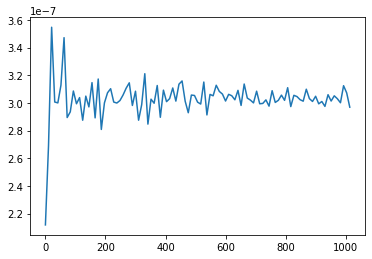

In [320]:
plt.plot(rdf.rvals, rdf.rdf)

In [315]:
moviefile = '41586_2019_1429_MOESM4_ESM.mov'
blobfile = '../data/blobs/{:s}.blob.csv'.format(moviefile)

In [290]:
color1 = 'g'
color2 = 'r'

rdfobj = blobrdf(vid, blobs, image_idx, color1, color2)

first_iter = True
for image_idx in range(vid.count_frames()):
    rdfobj = blobrdf(vid, blobs, image_idx, color1, color2)

    if first_iter:
        rvals = np.linspace(0, rdfobj.maxL, 100)
        rdf = np.zeros((len(rvals)))
        first_iter = False
    for idx in range(len(rvals)-1):
        rdf[idx] = rdfobj.calculate_rdf(rvals[idx], rvals[idx+1])

rvals = rvals[:-1]
rdf = rdf[:, :-1]    

271

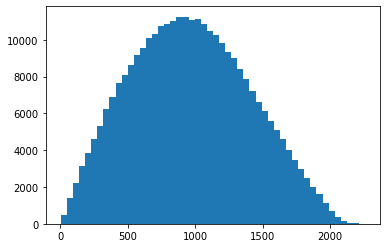

In [255]:
plt.hist(rdfobj.dist[:, :rdfobj.L2].flatten(), 50);

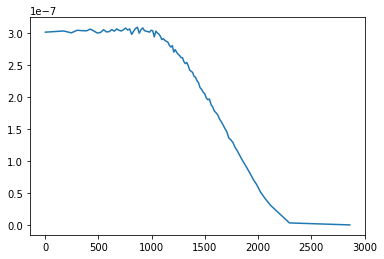

In [260]:
nbins = 100
q = 1/nbins

rvals = [np.quantile(rdfobj.dist, q * idx) for idx in range(nbins+1)]

rdf = np.zeros_like(rvals)
for idx in range(len(rvals)-1):
    rdf[idx] = rdfobj.calculate_rdf(rvals[idx], rvals[idx+1])
    
plt.plot(rvals, rdf);

In [1]:
# from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def f(x):
    return x

widgets.interact(f, x=10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

In [ ]:
import MDAnalysis
from MDAnalysis.tests.datafiles import PSF,DCD  # test trajectory
import numpy.linalg
u = MDAnalysis.Universe(PSF,DCD)  # always start with a Universe
nterm = u.select_atoms('segid 4AKE and name N')[0]  # can access structure via segid (s4AKE) and atom name
cterm = u.select_atoms('segid 4AKE and name C')[-1]  # ... takes the last atom named 'C'
bb = u.select_atoms('protein and backbone')  # a selection (a AtomGroup)
for ts in u.trajectory:  # iterate through all frames
    r = cterm.position - nterm.position  # end-to-end vector from atom positions
    d = numpy.linalg.norm(r)   # end-to-end distance
    rgyr = bb.radius_of_gyration()  # method of a AtomGroup; updates with each frame
    print( "frame = %d: d = %f Angstroem, Rgyr = %f Angstroem" % (ts.frame, d, rgyr))
    
    

In [ ]:
from flowermodel import plotting  
img_idx = 0
plotting.plot_blob_overlay(vid, img_idx, blobs)    

In [ ]:
blobs.to_csv(os.path.join(outputdir, 'blob{:d}.csv'.format(blob_idx)), index=False)

In [ ]:
import os
from flowermodel import util
blob_idx = 3
filename = '../data/movies/41586_2019_1429_MOESM4_ESM.mov'
outputdir = os.path.join('../data/blobs/', os.path.basename(filename))
util.mkdir_if_not_exist(outputdir)

blobs = fb.get_allframes_blobs(filename, min_idx=blob_idx, max_idx=blob_idx+1)
blobs.to_csv(os.path.join(outputdir, 'blob{:d}.csv'.format(blob_idx)))

In [ ]:
# filename = '../data/movies/41586_2019_1429_MOESM4_ESM.mov'
# allblobs = fb.get_allframes_blobs(filename)

In [ ]:
%%bash
flowermodel blob --filename ../data/movies/41586_2019_1429_MOESM4_ESM.mov --blob-index 2 

In [ ]:
# from skimage.restoration import inpaint_biharmonic, denoise_wavelet
# from skimage.morphology import disk, square
# from skimage.filters import rank
# from skimage.util import img_as_ubyte
# from skimage.exposure import equalize_hist, equalize_adapthist
# from skimage.feature import blob_dog, blob_log, blob_doh

def remove_text(img):
    th = threshold_otsu(img[:, :, 2])
    mask = img[:, :, 2] > th
    newimg = img.copy()
    newimg[:, :, 2] = 0
    newimg = inpaint_biharmonic(newimg, mask, multichannel=True)
    return newimg

def get_image(vid, img_idx):
    img = vid.get_data(img_idx)
    img = remove_text(img)
    # img = img[35:-42, :, :] # remove annotations on the image
    return img

In [ ]:
filename = '../data/movies/41586_2019_1429_MOESM4_ESM.mov'
vid = imageio.get_reader(filename,  'ffmpeg')

In [ ]:
vid.count_frames()

In [ ]:
img_idx = 0
img = get_image(vid, img_idx)

plt.figure(figsize=(8,8))
plt.imshow(img)

In [ ]:
import pandas as pd

# blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
# blobs_dog[:, 2] = blobs_dog[:, 2] * np.sqrt(2)
# blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

def get_blobs(imgray, min_sigma=3, max_sigma=10, num_sigma=10, threshold=.1, opening_disk_radius = 5):
#     imgray_opened = opening((imgray * 256).astype(int), disk(opening_disk_radius))/256     
    blobs = blob_log(imgray, max_sigma=max_sigma, min_sigma=min_sigma, num_sigma=num_sigma, threshold=threshold)
    blobs = pd.DataFrame(blobs, columns=['x', 'y', 'radius'])
    blobs['radius'] *= np.sqrt(2)
    return blobs

def plot_blobs(blobs, ax, color='r'):
    for y, x, r in blobs:
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax.add_patch(c)
#         ax.set_axis_off()


def get_frame_blobs(img, min_sigma=10, max_sigma=15, num_sigma=10, threshold=.1):
    '''
    This function finds all the blobs within the image and assigns them their corresponding color (GFP/RFP)
    '''
    blobs_r = get_blobs(img[:, :, 0], max_sigma=max_sigma, min_sigma=min_sigma, num_sigma=num_sigma, threshold=threshold)
    blobs_g = get_blobs(img[:, :, 1], max_sigma=max_sigma, min_sigma=min_sigma, num_sigma=num_sigma, threshold=threshold)   

    blobs_r['color'] = 'r'
    blobs_g['color'] = 'g'

    blobs = pd.concat([blobs_r, blobs_g])
    blobs.reset_index(drop=True, inplace=True)
    blobs[['x', 'y']] = blobs[['x', 'y']].astype(int)
    return blobs


filename = '../data/movies/41586_2019_1429_MOESM4_ESM.mov'
vid = imageio.get_reader(filename,  'ffmpeg')
img_idx = 100
img = get_image(vid, img_idx)
blobs = get_frame_blobs(img, min_sigma=10, max_sigma=15, num_sigma=10, threshold=.1)
blobs['frame'] = img_idx

In [ ]:
# blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
# blobs_dog[:, 2] = blobs_dog[:, 2] * np.sqrt(2)
# blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)




def get_blobs(imgray, min_sigma=3, max_sigma=10, num_sigma=10, threshold=.1, opening_disk_radius = 5):
#     imgray_opened = opening((imgray * 256).astype(int), disk(opening_disk_radius))/256     
    blobs = blob_log(imgray, max_sigma=max_sigma, min_sigma=min_sigma,
                     num_sigma=num_sigma, threshold=threshold)
    blobs[:, 2] *= np.sqrt(2)
    return blobs

def plot_blobs(blobs, ax, color='r'):
    for y, x, r in blobs:
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax.add_patch(c)
#         ax.set_axis_off()

_, ax = plt.subplots(1, 1, figsize=(8,8))
img_idx = 100
img = get_image(vid, img_idx)

ax.imshow(img)

blobs_r = get_blobs(img[:, :, 0], min_sigma=10, max_sigma=15, num_sigma=10, threshold=.1, opening_disk_radius = 5)
blobs_g = get_blobs(img[:, :, 1], min_sigma=10, max_sigma=15, num_sigma=10, threshold=.1, opening_disk_radius = 5)

plot_blobs(blobs_r, ax, color='red')
plot_blobs(blobs_g, ax, color='green')

In [ ]:
plt.figure(figsize=(8,8))
th = threshold_otsu(imgray_opened)
plt.imshow(imgray_opened > th)

In [ ]:
plt.hist(equalize_hist(imgray_opened.flatten()), 50);

In [ ]:
imgray_denoised = denoise_wavelet(imgray, multichannel=False)

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(imgray_denoised)

In [ ]:
plt.hist(imgray.flatten(), 50);

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(imgray > 0.6)

In [ ]:
imgray = img[:, :, 0]
imgray = (imgray * 256).astype(int)
plt.figure(figsize=(8,8))
plt.imshow(imgray)

In [ ]:

# selem = square(300)
# img_eq = rank.equalize(img_as_ubyte(imgray), selem=selem)
img_eq = equalize_hist(imgray)

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(img_eq)

In [ ]:
from skimage.morphology import opening

plt.figure(figsize=(8,8))
plt.imshow(opening(img_eq, disk(5)))

In [ ]:
plt.figure(figsize=(8,8))
imgray_opened = opening(imgray, disk(5))
plt.imshow(imgray_opened/256)
plt.colorbar()

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(imgray_opened/256 > 0.1)

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(equalize_hist(imgray_opened)); 

In [ ]:
filename = '../data/movies/41586_2019_1429_MOESM4_ESM.mov'
vid = imageio.get_reader(filename,  'ffmpeg')

im = 0
for image in vid.iter_data():
    im += image[:, :, 2] > 200

im = im/vid.count_frames()    
metadata = vid.get_meta_data()

plt.imshow(im);
plt.figure()
plt.plot(im.sum(axis=1))

In [ ]:

imsum = im.sum(axis=1)
th = imsum[:imsum.shape[0]//2].max()/2
# imsum = (imsum > th).astype(int)
# plt.plot(imsum)
# imsumdiff = np.diff(imsum)
# plt.plot(imsumdiff)

In [ ]:
plt.imshow(img[:, :, 2])

In [ ]:
plt.plot(img[:, :, 2].sum(axis=1))

In [ ]:
img.shape

In [ ]:
plt.figure(figsize=(12, 12))
plt.imshow(img[:, :, 0])

In [ ]:
plt.figure(figsize=(12, 12))
plt.imshow(img[:, :, 1])

In [ ]:
from scipy.signal import find_peaks
height = imsum[:imsum.shape[0]//2].max()/2
find_peaks(imsum, height=height, width=10)[0]